# PHẦN 1: KHỞI TẠO VÀ TẢI DỮ LIỆU

## 1.1. Import Libraries & Configuration

**Mục đích:** 
Thiết lập môi trường làm việc, import các thư viện cần thiết cho thao tác dữ liệu, trực quan hóa và xây dựng mô hình máy học.

**Biện luận:** 
*   Việc gom nhóm các thư viện (Data manipulation, Visualization, Sklearn) giúp code dễ quản lý và bảo trì. 
*   Cấu hình `sns.set_style` giúp biểu đồ đẹp và dễ nhìn hơn.
*   Sử dụng `warnings.filterwarnings('ignore')` để giữ cho output sạch sẽ, không bị làm rối bởi các cảnh báo phiên bản thư viện.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Sklearn Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Selection & Metrics 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, precision_recall_curve, 
                             f1_score, recall_score, precision_score, accuracy_score)

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Configuration 
sns.set_style("whitegrid") 
warnings.filterwarnings('ignore') # Tắt các cảnh báo version
RANDOM_STATE = 42

print("Libraries imported successfully.")

Libraries imported successfully.


## 1.2. Load Dataset & Initial Inspection

**Mục đích:** 
Tải dữ liệu vào DataFrame và thực hiện kiểm tra sơ bộ cấu trúc dữ liệu.

**Biện luận kết quả:** 
*   Cột `id` chỉ là định danh, không mang giá trị dự báo thống kê nên cần loại bỏ ngay để giảm nhiễu.
*   Quan sát sơ bộ `head()` và `info()` giúp xác định các cột dữ liệu bị thiếu (Null) và kiểu dữ liệu chưa chuẩn.

In [3]:
try:
    # Lưu ý: Cập nhật đường dẫn file nếu cần thiết
    df = pd.read_csv('./Data_Stroke/stroke_data_raw.csv')
    
    # Loại bỏ cột ID ngay vì không có giá trị dự báo
    if 'id' in df.columns:
        df.drop(columns=['id'], inplace=True)
        
    print("Dataset loaded successfully.")
    print(f"Shape: {df.shape}")
    display(df.head())
    print("-" * 30)
    df.info()
except FileNotFoundError:
    print("File not found. Please check the path.")

Dataset loaded successfully.
Shape: (5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## 1.3. Data Formatting (Type Conversion)

**Mục đích:** 
Chuyển đổi các biến định tính (object) sang kiểu dữ liệu `category`.

**Biện luận:**
*   Giúp tối ưu hóa bộ nhớ (memory usage).
*   Là bước chuẩn bị cần thiết để các thư viện trực quan hóa (như Seaborn) và một số thuật toán hiểu đúng bản chất dữ liệu.

In [ ]:
# Xác định các biến phân loại
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                        'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Chuyển đổi kiểu dữ liệu
for feature in categorical_features:
    df[feature] = df[feature].astype('category')

print("Data types converted.")
df.info()

Data types converted.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


# PHẦN 2: KHÁM PHÁ DỮ LIỆU (EDA)

## 2.1. Missing Values Analysis

**Mục đích:** 
Kiểm tra tỷ lệ dữ liệu khuyết thiếu và quyết định chiến lược xử lý (Imputation strategy).

**Biện luận kết quả:**
*   Chỉ có cột `bmi` bị thiếu dữ liệu.
*   Histogram cho thấy phân phối BMI hơi lệch. Do đó, trong phần Preprocessing Pipeline, chúng ta sẽ sử dụng chiến lược điền giá trị **Median (Trung vị)** thay vì Mean (Trung bình) để tránh ảnh hưởng bởi các giá trị ngoại lai (outliers).

Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


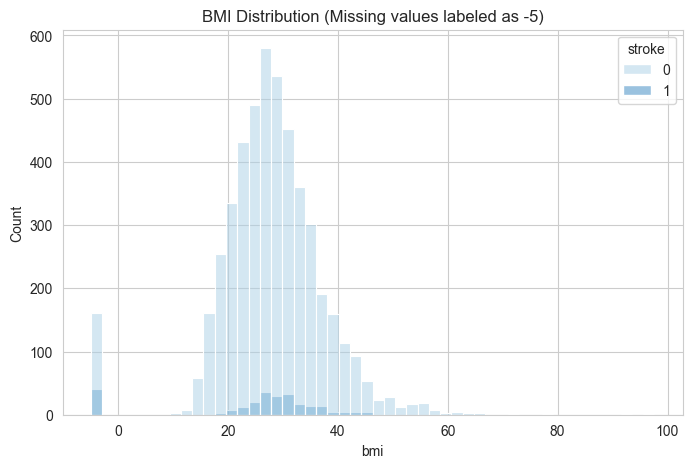

In [14]:
print("Missing values per column:")
print(df.isnull().sum())

# Trực quan hóa phân phối BMI (bao gồm cả missing được gán tạm là -5 để vẽ)
plt.figure(figsize=(8, 5))
bmi_temp = df['bmi'].fillna(-5).astype(float) 
sns.histplot(x=bmi_temp, hue=df['stroke'], bins=50, palette='Blues')
plt.title('BMI Distribution (Missing values labeled as -5)')
plt.show()

## 2.2. Correlation Analysis

**Mục đích:** 
Kiểm tra mối tương quan tuyến tính giữa các biến số để phát hiện đa cộng tuyến (Multicollinearity) hoặc các biến có quan hệ mạnh với target.

**Biện luận kết quả:**
*   Tuổi (`age`) thường có tương quan cao nhất với nguy cơ đột quỵ.
*   Không có cặp biến độc lập nào có tương quan quá cao (ví dụ > 0.9), nên không cần loại bỏ biến do đa cộng tuyến.

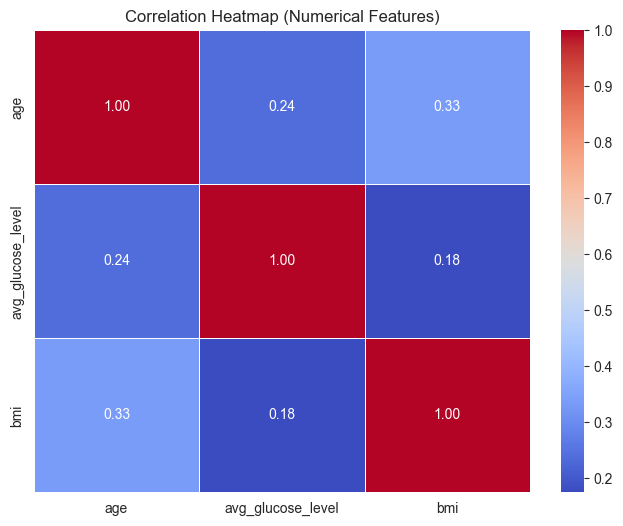

In [15]:
plt.figure(figsize=(8, 6))
# Chỉ chọn các cột số để tính correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## 2.3. Class Imbalance Check

**Mục đích:** 
Xác định mức độ mất cân bằng của biến mục tiêu (`stroke`). Đây là bước **quan trọng nhất** định hình chiến lược mô hình hóa.

**Biện luận kết quả:**
*   Tỷ lệ Stroke (Lớp 1) chỉ chiếm khoảng **4.8%**.
*   **Kết luận:** Đây là bài toán Imbalanced Classification nặng. 
*   **Chiến lược:**
    1.  Không dùng `Accuracy` để đánh giá.
    2.  Sử dụng `class_weight='balanced'` trong các mô hình.
    3.  Tập trung vào **Recall** (độ nhạy) và tinh chỉnh **Threshold** ở các bước sau.

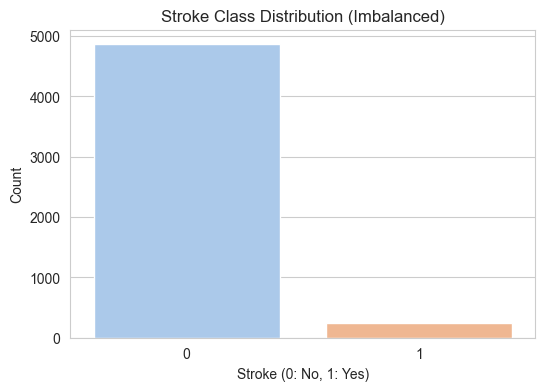

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette='pastel', hue='stroke', legend=False)
plt.title("Stroke Class Distribution (Imbalanced)")
plt.xlabel("Stroke (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

print(df['stroke'].value_counts(normalize=True))

## 2.4. Outlier & Distribution Analysis

**Mục đích:** 
Hiểu rõ phân phối của các biến số thực.

**Biện luận kết quả:**
*   `avg_glucose_level`: Có phân phối lệch phải mạnh, nhiều giá trị cao (outliers) tương ứng với nhóm người có đường huyết cao hoặc tiểu đường.
*   `bmi`: Cũng có nhiều outliers ở phía cao.
*   **Xử lý:** Sử dụng `RobustScaler` hoặc `StandardScaler` trong pipeline để giảm ảnh hưởng, nhưng không nên loại bỏ (remove) các outliers này vì trong y tế, các chỉ số cao thường liên quan trực tiếp đến bệnh lý.

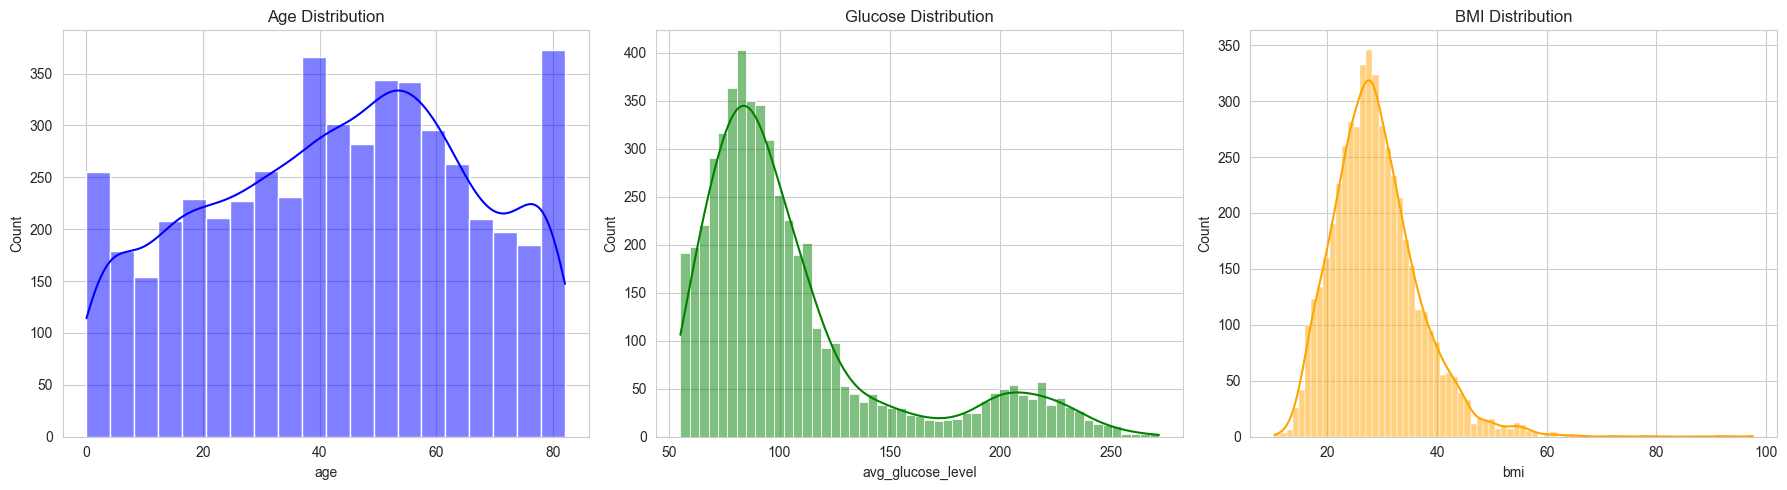

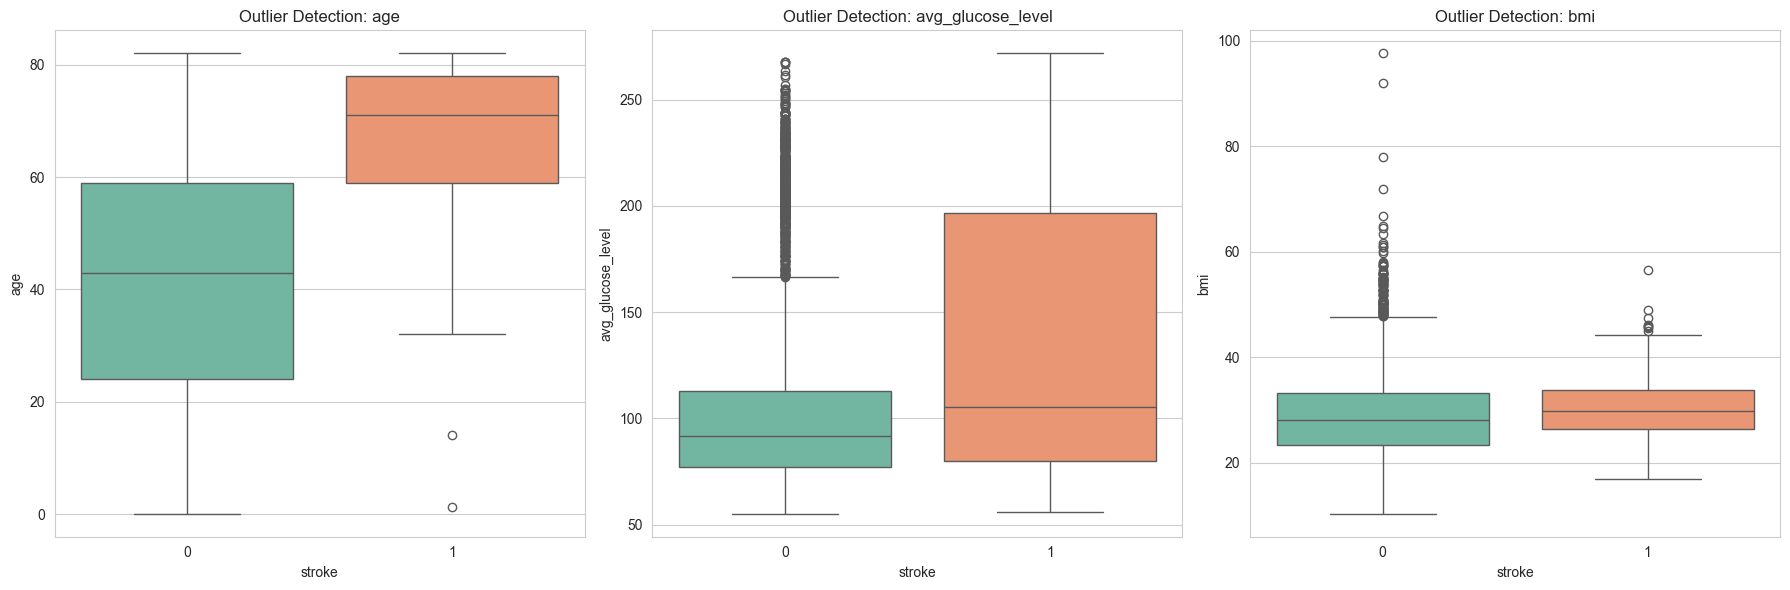

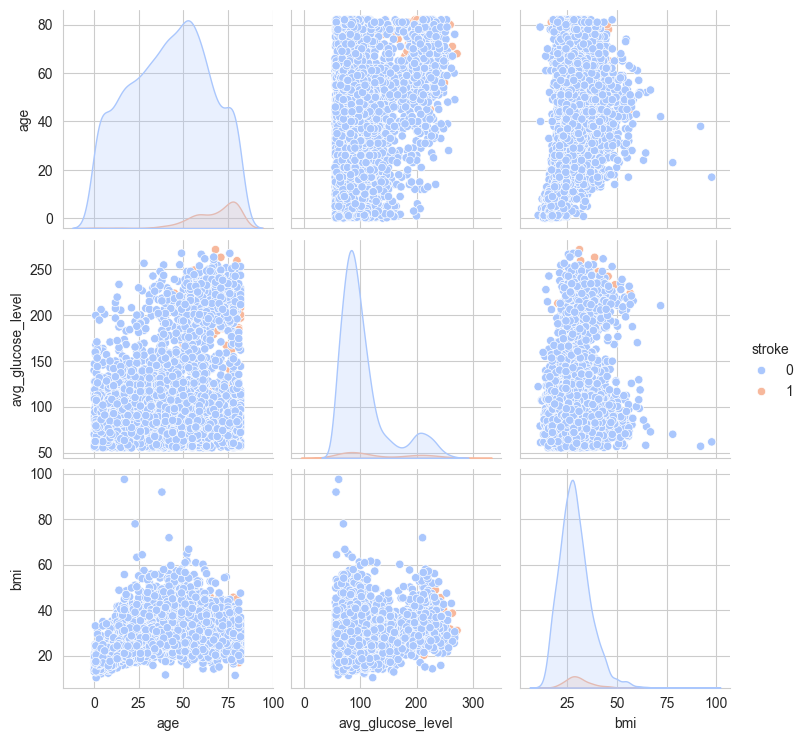

In [30]:
# Distribution Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], kde=True, color='blue', ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['avg_glucose_level'], kde=True, color='green', ax=axes[1]).set_title('Glucose Distribution')
sns.histplot(df['bmi'].dropna(), kde=True, color='orange', ax=axes[2]).set_title('BMI Distribution')
plt.tight_layout()
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(18, 6))
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='stroke', y=col, palette='Set2', hue='stroke', legend=False)
    plt.title(f'Outlier Detection: {col}')
plt.tight_layout()
plt.show()

cols_to_plot = ['age', 'avg_glucose_level', 'bmi', 'stroke']
sns.pairplot(df[cols_to_plot], hue='stroke', palette='coolwarm', diag_kind='kde')
plt.show()

## 2.5. Categorical Feature Analysis & Cleaning

**Mục đích:** 
Quan sát mối quan hệ giữa các biến phân loại với bệnh đột quỵ và làm sạch dữ liệu nhiễu.

**Hành động:** 
Phát hiện giá trị `gender='Other'` có số lượng không đáng kể (1 dòng), nên loại bỏ để tránh tạo ra cột dư thừa khi One-Hot Encoding, giữ cho mô hình sạch.

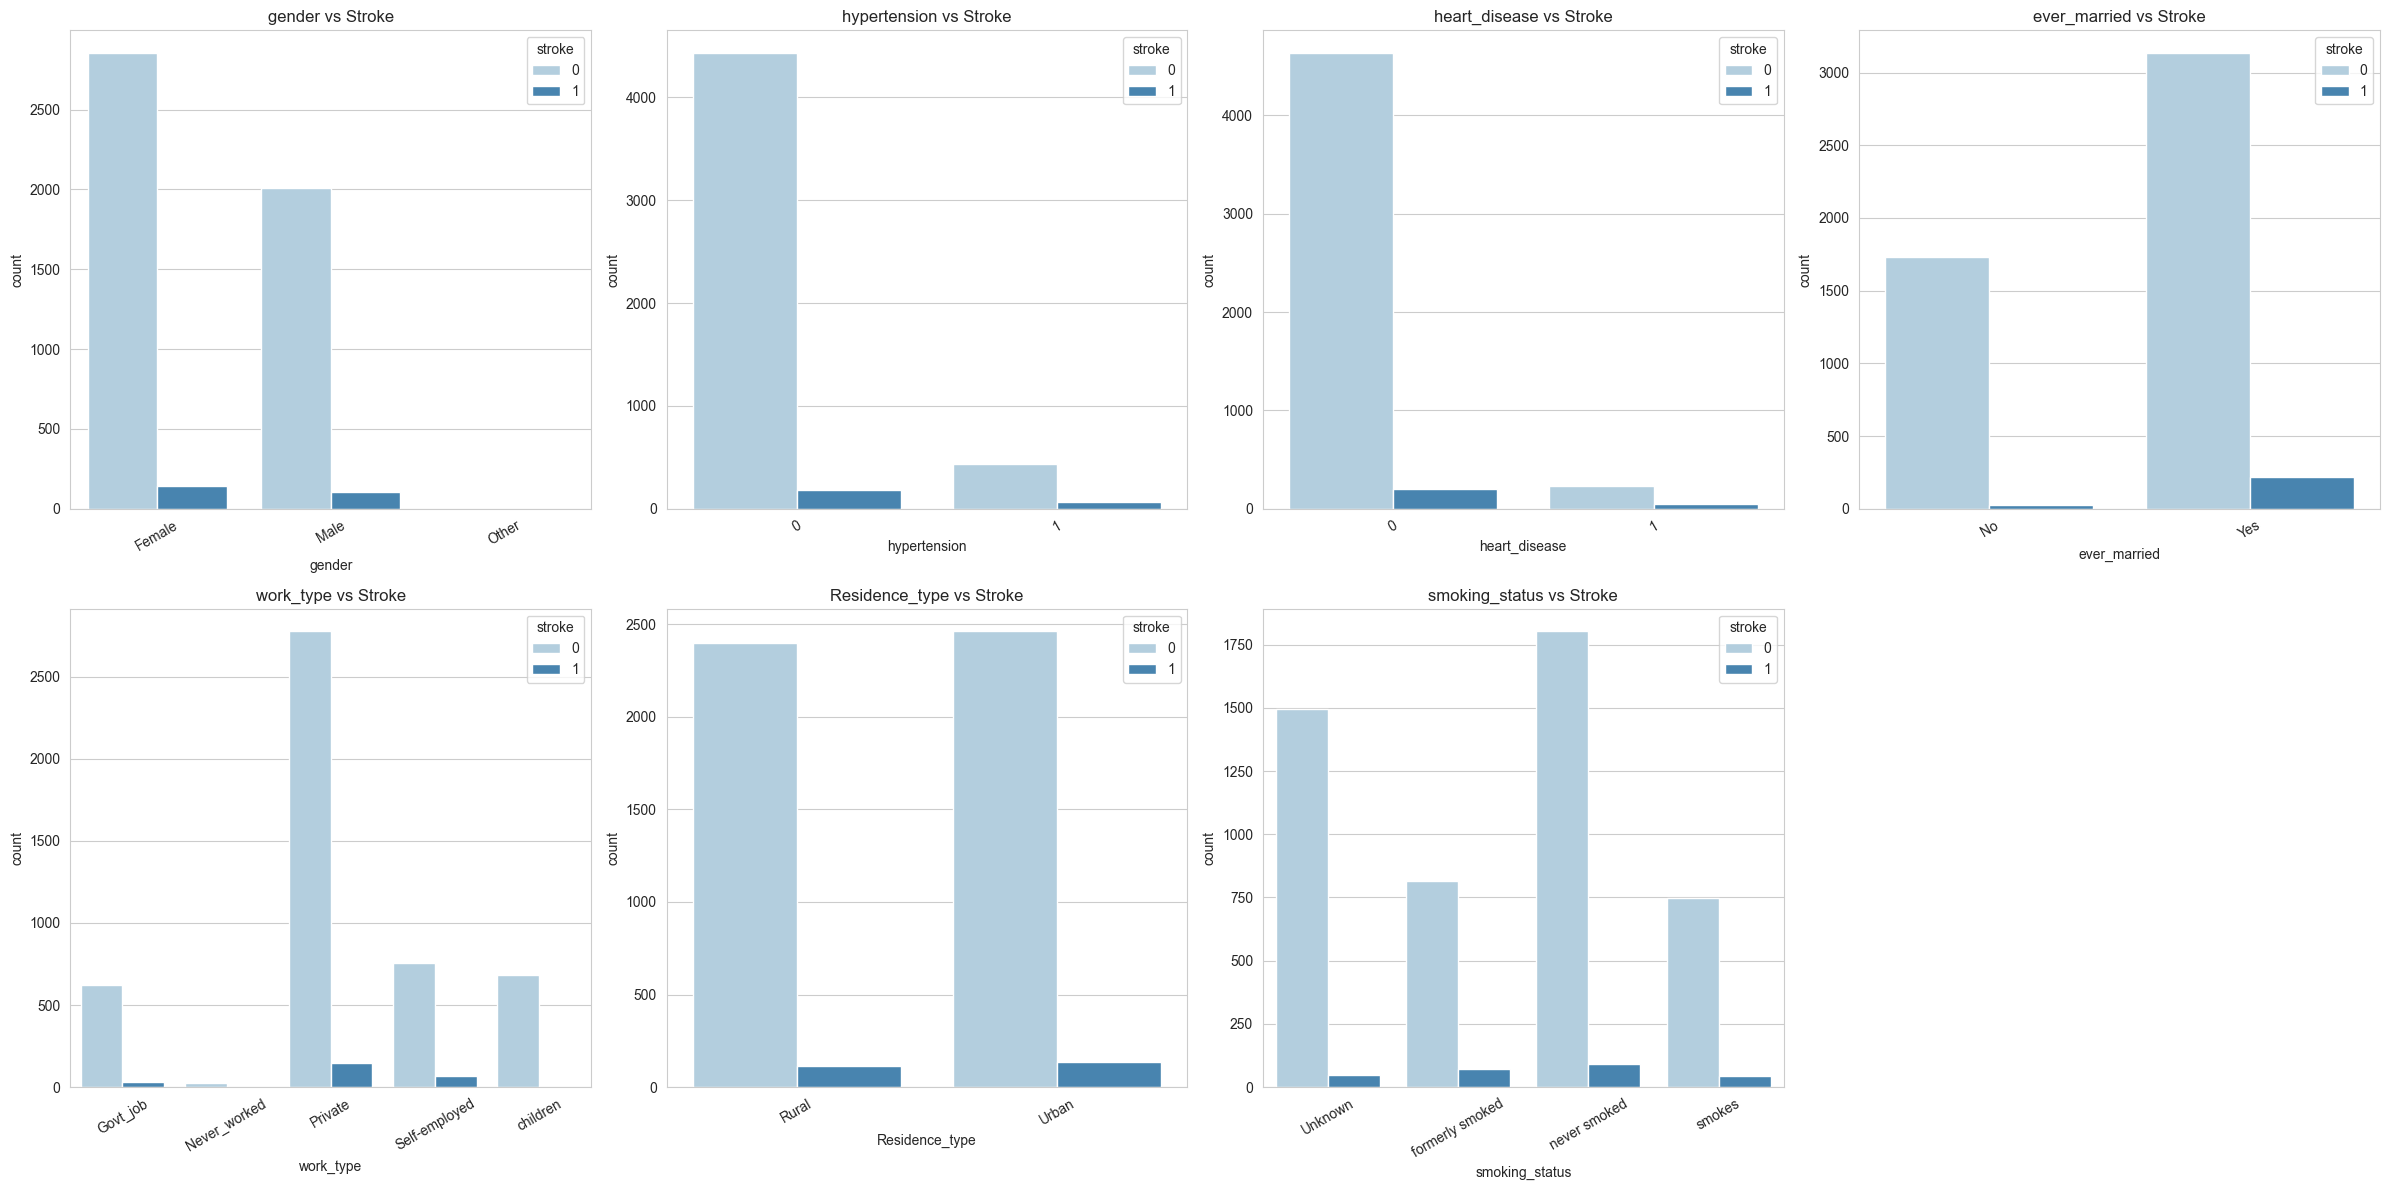

In [18]:
# Vẽ biểu đồ
categorical_plot_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                         'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_plot_cols):
    if i < len(axes):
        sns.countplot(x=col, hue='stroke', data=df, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{col} vs Stroke')
        axes[i].tick_params(axis='x', rotation=30)
        
# Xóa subplot thừa
for j in range(len(categorical_plot_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
# Loại bỏ giới tính 'Other' (số lượng quá ít, gây nhiễu)
print(f"Original shape: {df.shape}")
df = df[df['gender'] != 'Other']
print(f"Shape after dropping 'Other' gender: {df.shape}")

Original shape: (5110, 11)
Shape after dropping 'Other' gender: (5109, 11)


# PHẦN 3: TIỀN XỬ LÝ DỮ LIỆU (DATA PREPROCESSING)

## 3.1. Pipeline Construction & Strategic Splitting

**Mục đích:** 
Xây dựng quy trình xử lý dữ liệu tự động (Pipeline) để tránh rò rỉ dữ liệu (Data Leakage) và chia tập dữ liệu chuẩn.

**Chiến lược xử lý:**
1.  **Numerical:** Điền khuyết bằng `median` (trung vị) và chuẩn hóa bằng `StandardScaler`.
2.  **Categorical:** Sử dụng `OneHotEncoder` để chuyển đổi sang dạng số.
3.  **Splitting:** Chia dữ liệu thành 3 tập độc lập:
    *   **Train (70%):** Dùng để huấn luyện.
    *   **Validation (15%):** Dùng để tinh chỉnh ngưỡng (Threshold Tuning) và so sánh mô hình.
    *   **Test (15%):** Dùng để đánh giá cuối cùng (Unseen Data).

In [20]:
# 1. Tách Feature và Target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 2. Định nghĩa Pipeline
def get_preprocessor():
    num_cols = ['age', 'avg_glucose_level', 'bmi']
    cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                'work_type', 'Residence_type', 'smoking_status']

    num_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    return ColumnTransformer(transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

preprocessor = get_preprocessor()

# 3. Chia tập dữ liệu (Train / Validation / Test)
# Bước 1: Tách Test ra (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=RANDOM_STATE, stratify=y
)

# Bước 2: Tách Train thành Train và Val (0.176 của 85% ~ 15% tổng)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.176, random_state=RANDOM_STATE, stratify=y_train_full
)

print(f"Train shape: {X_train.shape} | Val shape: {X_val.shape} | Test shape: {X_test.shape}")

# 4. Fit và Transform dữ liệu
# Chỉ fit trên tập TRAIN để tránh Data Leakage
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

Train shape: (3577, 10) | Val shape: (765, 10) | Test shape: (767, 10)


# PHẦN 4: LỰA CHỌN MÔ HÌNH (MODEL SELECTION)

**Mục đích:** 
So sánh hiệu năng của các thuật toán phổ biến trên cùng một tập dữ liệu.

**Biện luận:**
*   Metric được chọn để so sánh là **Recall** vì trong y tế, việc bỏ sót bệnh nhân (False Negative) nguy hiểm hơn nhiều so với báo động giả.
*   Áp dụng tham số `class_weight='balanced'` cho các mô hình để tự động xử lý mất cân bằng mẫu.

**Kết quả dự kiến:**
*   Các mô hình tuyến tính như **Logistic Regression** hoặc SVM thường cho Recall cao hơn mặc định khi sử dụng `class_weight`, do cơ chế tối ưu hóa của chúng. Các mô hình cây (Random Forest) thường cần tinh chỉnh sâu hơn để đạt Recall tốt.

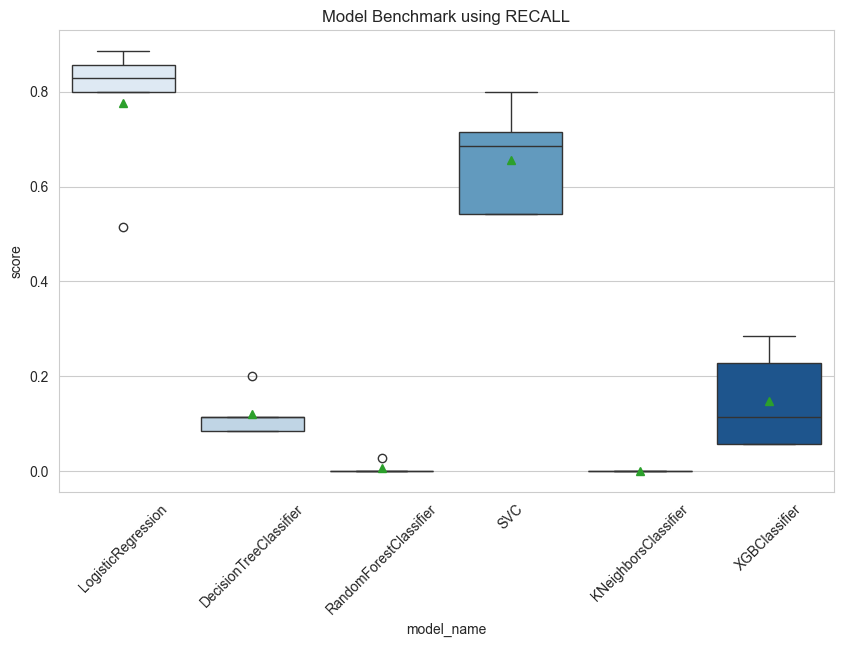

                            mean       std
model_name                                
LogisticRegression      0.777143  0.150374
SVC                     0.657143  0.112486
XGBClassifier           0.148571  0.103805
DecisionTreeClassifier  0.120000  0.046948
RandomForestClassifier  0.005714  0.012778
KNeighborsClassifier    0.000000  0.000000


In [21]:
models = [
    LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE),
    DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    SVC(probability=True, class_weight='balanced', random_state=RANDOM_STATE),
    KNeighborsClassifier(), 
    XGBClassifier(scale_pos_weight=19, eval_metric='logloss', random_state=RANDOM_STATE) 
]

def generate_baseline_results(models, X, y, metrics='recall', cv=5):
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)
    entries = []
    
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'score'])
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='model_name', y='score', data=cv_df, palette='Blues', showmeans=True)
    plt.title(f'Model Benchmark using {metrics.upper()}')
    plt.xticks(rotation=45)
    plt.show()
    
    return cv_df.groupby('model_name')['score'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)

# Chạy Benchmark
benchmark_results = generate_baseline_results(models, X_train_processed, y_train, metrics='recall')
print(benchmark_results)

# PHẦN 5: HUẤN LUYỆN & TINH CHỈNH NGƯỠNG (MODEL TUNING)

## 5.1. Train Final Model & Default Evaluation

**Mục đích:** 
Huấn luyện mô hình tốt nhất (được chọn từ phần 4, ở đây là **Logistic Regression**) và đánh giá hiệu quả ban đầu với ngưỡng mặc định 0.5.

**Biện luận:**
*   Với `class_weight='balanced'`, mô hình thường dự đoán xác suất lớp 1 cao hơn bình thường.
*   Ngưỡng 0.5 thường cho **Recall rất cao** nhưng **Precision rất thấp** (quá nhiều báo động giả). Do đó cần bước tối ưu tiếp theo.

In [22]:
# Khởi tạo và huấn luyện mô hình tốt nhất (Logistic Regression)
final_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)
final_model.fit(X_train_processed, y_train)

# Dự báo trên tập Val
y_val_pred = final_model.predict(X_val_processed)
y_val_proba = final_model.predict_proba(X_val_processed)[:, 1]

print("--- Classification Report (Val - Default Threshold 0.5) ---")
print(classification_report(y_val, y_val_pred))

--- Classification Report (Val - Default Threshold 0.5) ---
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       728
           1       0.14      0.86      0.24        37

    accuracy                           0.74       765
   macro avg       0.57      0.80      0.54       765
weighted avg       0.95      0.74      0.81       765



## 5.2. Threshold Optimization (Finding the Sweet Spot)

**Mục đích:** 
Tìm ngưỡng (Threshold) tối ưu để cân bằng giữa Precision và Recall, nhằm tối đa hóa **F1-Score**.

**Biện luận:**
*   Đường cong Precision-Recall giúp ta nhìn thấy sự đánh đổi.
*   Việc tìm ngưỡng giúp ta lọc bớt các ca dự đoán "yếu", từ đó tăng độ chính xác (Precision) mà không làm giảm quá nhiều khả năng phát hiện bệnh (Recall).

>> Optimal F1 Threshold: 0.7432
   Max F1-Score: 0.3556


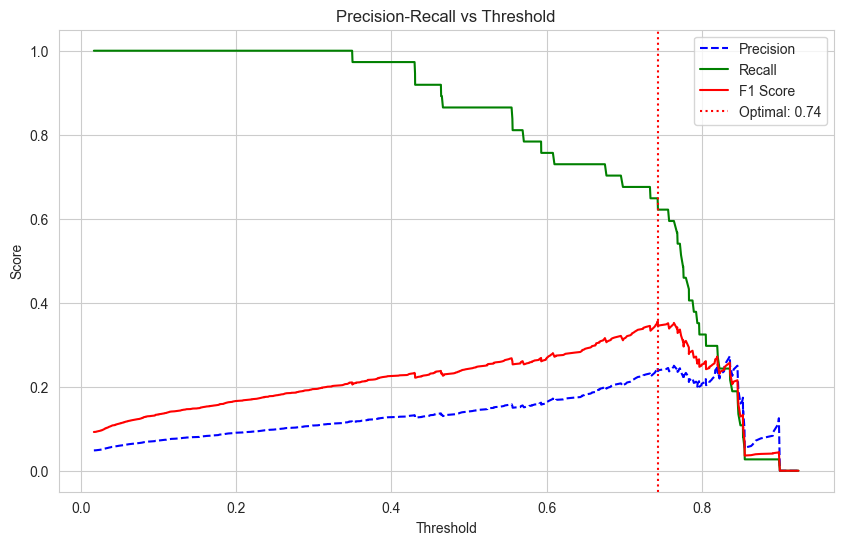

In [23]:
# Tính toán Precision, Recall cho các ngưỡng khác nhau
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

# Tính F1-scores cho từng ngưỡng
with np.errstate(divide='ignore', invalid='ignore'):
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    f1_scores = np.nan_to_num(f1_scores)

# Tìm ngưỡng F1 tốt nhất
best_idx = np.argmax(f1_scores)
best_f1_threshold = thresholds[best_idx]

print(f">> Optimal F1 Threshold: {best_f1_threshold:.4f}")
print(f"   Max F1-Score: {f1_scores[best_idx]:.4f}")

# Vẽ biểu đồ trade-off
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.plot(thresholds, f1_scores[:-1], "r-", label="F1 Score")
plt.axvline(best_f1_threshold, color='red', linestyle=':', label=f'Optimal: {best_f1_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()

## 5.3. Comparative Evaluation: Default (0.5) vs. Optimal F1
**Mục đích:** 
So sánh trực diện hiệu quả giữa việc không làm gì (dùng ngưỡng mặc định 0.5) và việc sử dụng ngưỡng tối ưu theo toán học (Max F1-Score).
**Biện luận:**
* Việc này giúp chứng minh rằng kỹ thuật Threshold Tuning thực sự mang lại hiệu quả, giúp cân bằng lại mô hình đang bị lệch do dữ liệu mất cân bằng.
* Chúng ta sẽ thấy rõ sự chuyển dịch: Ngưỡng Default thường cho Recall rất cao nhưng Precision quá thấp (báo động giả quá nhiều). Ngưỡng Optimal F1 sẽ kéo Precision lên.

>> Ngưỡng F1 tối ưu toán học (Optimal F1): 0.7432
   Max F1-Score đạt được: 0.3556

============================== SO SÁNH HIỆU SUẤT (VAL SET) ==============================
--- Classification Report (Val - Default 0.5) ---
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       728
           1       0.14      0.86      0.24        37

    accuracy                           0.74       765
   macro avg       0.57      0.80      0.54       765
weighted avg       0.95      0.74      0.81       765

--- Classification Report (Val - Optimal F1: 0.7432) ---
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       728
           1       0.24      0.65      0.36        37

    accuracy                           0.89       765
   macro avg       0.61      0.77      0.65       765
weighted avg       0.94      0.89      0.91       765



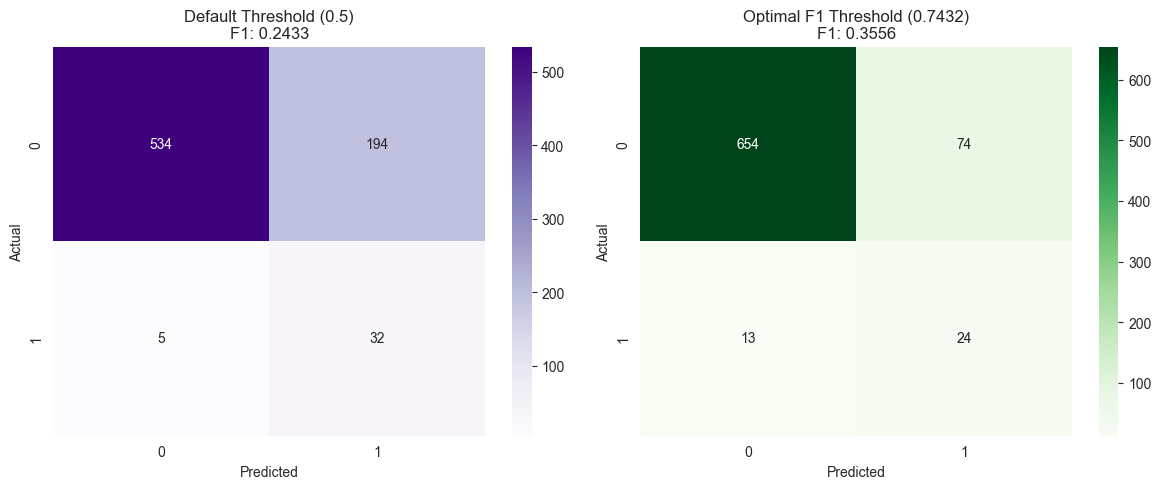

In [26]:
# 1. Ngưỡng mặc định (0.5)
y_val_default = (y_val_proba >= 0.5).astype(int)

# 2. Ngưỡng tối ưu toán học (Best F1 tìm được ở bước 5.2)
y_val_optimal = (y_val_proba >= best_f1_threshold).astype(int)

print(f">> Ngưỡng F1 tối ưu toán học (Optimal F1): {best_f1_threshold:.4f}")
print(f"   Max F1-Score đạt được: {f1_scores[best_idx]:.4f}")

print("\n" + "="*30 + " SO SÁNH HIỆU SUẤT (VAL SET) " + "="*30)

# In report dạng dictionary để dễ so sánh hoặc in text
print("--- Classification Report (Val - Default 0.5) ---")
print(classification_report(y_val, y_val_default))

print(f"--- Classification Report (Val - Optimal F1: {best_f1_threshold:.4f}) ---")
print(classification_report(y_val, y_val_optimal))

# Vẽ 2 Confusion Matrix cạnh nhau để thấy sự thay đổi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matrix Default
sns.heatmap(confusion_matrix(y_val, y_val_default), annot=True, fmt='d', cmap='Purples', ax=axes[0])
axes[0].set_title(f'Default Threshold (0.5)\nF1: {f1_score(y_val, y_val_default):.4f}')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Matrix Optimal F1
sns.heatmap(confusion_matrix(y_val, y_val_optimal), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'Optimal F1 Threshold ({best_f1_threshold:.4f})\nF1: {f1_score(y_val, y_val_optimal):.4f}')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

## 5.4. Visual Threshold Selection (Business Decision Support)
**Mục đích:**
Máy tính chọn ngưỡng dựa trên F1 cao nhất, nhưng con người (bác sĩ/chuyên gia) cần nhìn thấy bức tranh toàn cảnh để đưa ra quyết định đánh đổi (Trade-off). Chúng ta sẽ vẽ biểu đồ biến thiên của các chỉ số theo ngưỡng.
**Biện luận:**
* Biểu đồ 1 (Full Range): Cho thấy xu hướng chung. Recall sẽ giảm dần và Precision sẽ tăng dần khi Threshold tăng.
* Biểu đồ 2 (Zoom View): Phóng to vào khu vực "nhạy cảm" (thường là 0.4 đến 0.9 đối với Logistic Regression balanced) để bạn có thể chọn con số chính xác. Ví dụ: Bạn muốn Recall ít nhất là 0.85, bạn sẽ nhìn vào biểu đồ để xem Threshold nào thỏa mãn điều đó với Precision cao nhất có thể.

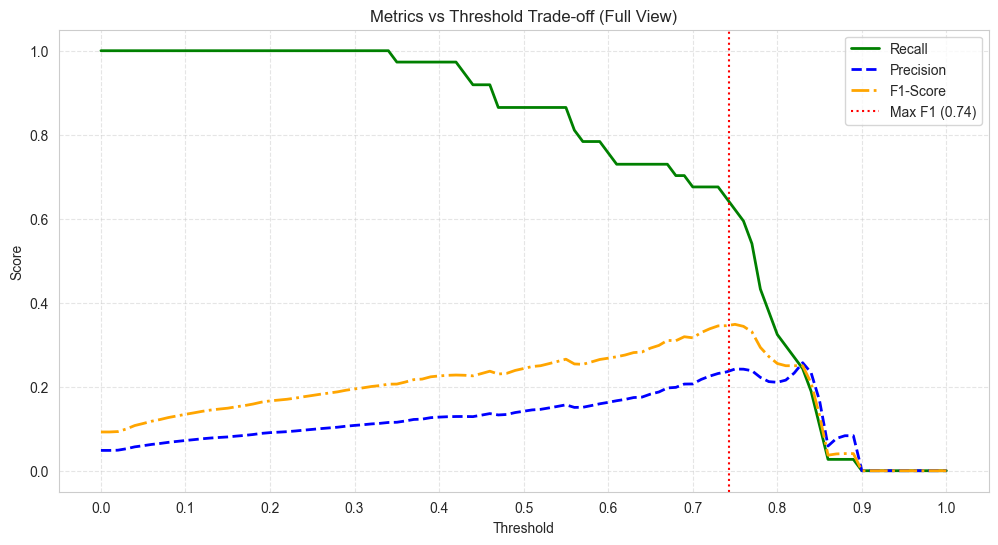

In [27]:
from sklearn.metrics import recall_score, precision_score

# Tạo dải threshold từ 0 đến 1 để vẽ biểu đồ đường (Line Plot)
thresholds_range = np.arange(0.0, 1.01, 0.01)
recalls_list = []
precisions_list = []
f1_scores_list = []

# Tính toán chỉ số cho từng threshold thủ công để vẽ biểu đồ cho mượt
for t in thresholds_range:
    y_pred_t = (y_val_proba >= t).astype(int)
    
    recalls_list.append(recall_score(y_val, y_pred_t, zero_division=0))
    precisions_list.append(precision_score(y_val, y_pred_t, zero_division=0))
    f1_scores_list.append(f1_score(y_val, y_pred_t, zero_division=0))

# --- BIỂU ĐỒ 1: VIEW TOÀN CẢNH ---
plt.figure(figsize=(12, 6))
plt.plot(thresholds_range, recalls_list, label='Recall', color='green', linewidth=2)
plt.plot(thresholds_range, precisions_list, label='Precision', color='blue', linewidth=2, linestyle='--')
plt.plot(thresholds_range, f1_scores_list, label='F1-Score', color='orange', linewidth=2, linestyle='-.')

# Đánh dấu điểm F1 tối ưu tìm được ở trên
plt.axvline(best_f1_threshold, color='red', linestyle=':', label=f'Max F1 ({best_f1_threshold:.2f})')

plt.title('Metrics vs Threshold Trade-off (Full View)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

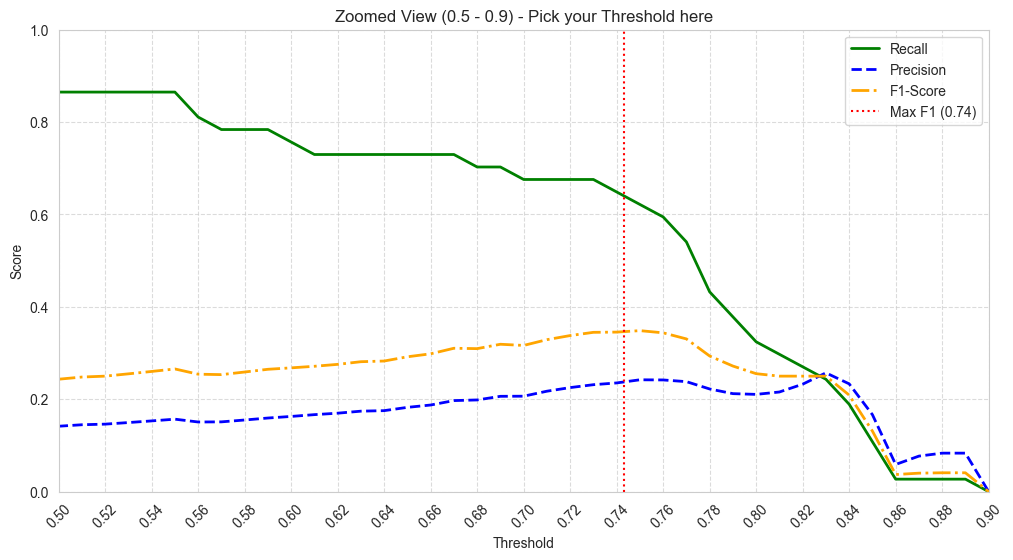

In [29]:
# --- BIỂU ĐỒ 2: ZOOM VIEW (Để chọn tay chính xác hơn) ---

# Cấu hình khoảng Zoom (Bạn có thể chỉnh lại dựa trên biểu đồ trên)
# Logistic Regression balanced thường có điểm cắt ở khoảng cao
ZOOM_START = 0.50
ZOOM_END   = 0.90

plt.figure(figsize=(12, 6))
plt.plot(thresholds_range, recalls_list, label='Recall', color='green', linewidth=2)
plt.plot(thresholds_range, precisions_list, label='Precision', color='blue', linewidth=2, linestyle='--')
plt.plot(thresholds_range, f1_scores_list, label='F1-Score', color='orange', linewidth=2, linestyle='-.')

# Giới hạn trục X để phóng to
plt.xlim(ZOOM_START, ZOOM_END)
plt.ylim(0.0, 1.0) # Scale Y giữ nguyên để dễ nhìn

# Chia vạch nhỏ hơn (mỗi 0.02) để dễ đọc số chính xác
plt.xticks(np.arange(ZOOM_START, ZOOM_END + 0.01, 0.02), rotation=45)
plt.grid(True, which='both', linestyle='--', alpha=0.7)

plt.axvline(best_f1_threshold, color='red', linestyle=':', label=f'Max F1 ({best_f1_threshold:.2f})')

plt.title(f'Zoomed View ({ZOOM_START} - {ZOOM_END}) - Pick your Threshold here')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

## 5.5. Manual Threshold Selection & Verification
**Mục đích:**
Sau khi quan sát biểu đồ Zoom, bạn sẽ chọn một ngưỡng cụ thể (ví dụ bạn muốn giữ Recall cao hơn ngưỡng Max F1 một chút, hoặc muốn an toàn hơn). Cell này cho phép bạn nhập số đó vào và kiểm tra ngay lập tức trên tập Validation.

**Biện luận:**
* Đây là bước "Human-in-the-loop". Chúng ta không tin tưởng mù quáng vào con số F1 tối đa.
* Kết quả ở đây sẽ xác nhận xem ngưỡng bạn chọn bằng mắt có thực sự mang lại Confusion Matrix mong muốn hay không (ví dụ: chấp nhận sai 10 ca để bắt đúng thêm 5 ca bệnh).

>> Testing Manual Threshold (0.73) on VALIDATION set...
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       728
           1       0.23      0.68      0.34        37

    accuracy                           0.88       765
   macro avg       0.61      0.78      0.64       765
weighted avg       0.95      0.88      0.90       765



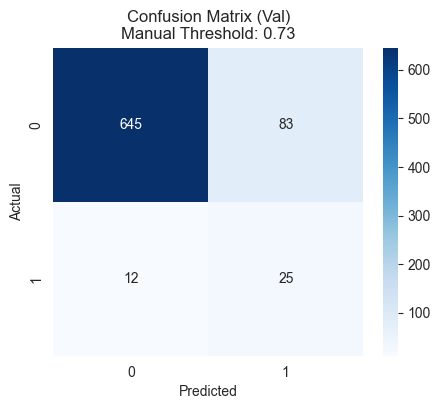

Nhận xét: Với ngưỡng 0.73, bạn bắt được 67.57% số ca bệnh trong tập Val.


In [31]:
# --- NHẬP NGƯỠNG BẠN TỰ CHỌN Ở ĐÂY ---
# Ví dụ: Dựa vào biểu đồ Zoom, tôi muốn Recall khoảng 0.8, tôi chọn 0.73
MY_CHOSEN_THRESHOLD = 0.73  
# ---------------------------------------

print(f">> Testing Manual Threshold ({MY_CHOSEN_THRESHOLD}) on VALIDATION set...")

# Áp dụng ngưỡng vào tập Val
y_val_manual = (y_val_proba >= MY_CHOSEN_THRESHOLD).astype(int)

# In báo cáo chi tiết
print(classification_report(y_val, y_val_manual))

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_val_manual), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Val)\nManual Threshold: {MY_CHOSEN_THRESHOLD}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Lời khuyên tự động
val_recall = recall_score(y_val, y_val_manual)
print(f"Nhận xét: Với ngưỡng {MY_CHOSEN_THRESHOLD}, bạn bắt được {val_recall:.2%} số ca bệnh trong tập Val.")

# PHẦN 6: KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST (FINAL TEST)

**Mục đích:** 
Đánh giá hiệu năng của mô hình hoàn chỉnh trên tập dữ liệu **hoàn toàn mới (Test set)** để đảm bảo tính tổng quát hóa (generalization).

**Biện luận kết quả:**
*   **Recall:** Cho biết tỷ lệ bệnh nhân thực sự bị đột quỵ mà mô hình phát hiện được.
*   **Precision:** Cho biết độ tin cậy khi mô hình dự báo một người bị đột quỵ.
*   **ROC-AUC:** Đánh giá khả năng phân loại tổng quát của mô hình.

>> FINAL RUN: Applying Threshold (0.73) on TEST set...

FINAL TEST RESULTS (Threshold: 0.73)
Recall (Test):    0.7027
Precision (Test): 0.2407
F1-Score (Test):  0.3586
ROC-AUC (Test):   0.8279
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       730
           1       0.24      0.70      0.36        37

    accuracy                           0.88       767
   macro avg       0.61      0.80      0.65       767
weighted avg       0.95      0.88      0.91       767



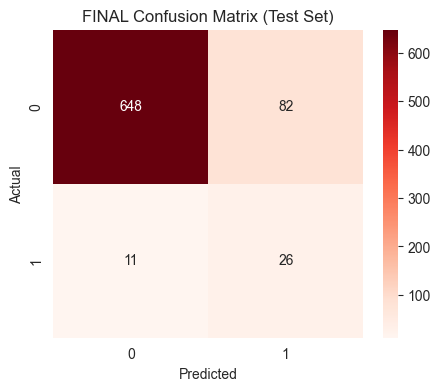

In [32]:
# Dùng lại ngưỡng đã chọn ở trên
FINAL_THRESHOLD = MY_CHOSEN_THRESHOLD 

print(f">> FINAL RUN: Applying Threshold ({FINAL_THRESHOLD}) on TEST set...")

# 1. Lấy xác suất trên tập TEST (Lần đầu tiên và duy nhất đụng vào Test set)
y_test_proba = final_model.predict_proba(X_test_processed)[:, 1]

# 2. Áp dụng ngưỡng
y_test_final = (y_test_proba >= FINAL_THRESHOLD).astype(int)

# 3. Báo cáo kết quả cuối cùng
from sklearn.metrics import roc_auc_score

print("\n" + "="*50)
print(f"FINAL TEST RESULTS (Threshold: {FINAL_THRESHOLD})")
print("="*50)

print(f"Recall (Test):    {recall_score(y_test, y_test_final):.4f}")
print(f"Precision (Test): {precision_score(y_test, y_test_final):.4f}")
print(f"F1-Score (Test):  {f1_score(y_test, y_test_final):.4f}")
print(f"ROC-AUC (Test):   {roc_auc_score(y_test, y_test_proba):.4f}")
print("-" * 30)
print(classification_report(y_test, y_test_final))

# 4. Matrix cuối cùng
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_final), annot=True, fmt='d', cmap='Reds')
plt.title(f'FINAL Confusion Matrix (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()